In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_dir = "datasets/dogvscat/train/training_set"

In [3]:
batch_size = 32
img_size = (64,64)
num_classes = 2

In [4]:
train_data = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 width_shift_range=0.2,
                                 height_shift_range=0.2,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True,
                                 fill_mode='nearest')

In [5]:
train_dataset = train_data.flow_from_directory(data_dir,
                                               target_size=img_size,
                                               batch_size=batch_size,
                                               class_mode='categorical',shuffle=True)

Found 25000 images belonging to 2 classes.


In [6]:
train_dataset.class_indices

{'cat': 0, 'dog': 1}

In [7]:
images,labels = next(train_dataset)

In [8]:
labels

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.]], dtype=float32)

In [9]:
images[0]

array([[[0.5980106 , 0.58829266, 0.56677186],
        [0.5967108 , 0.59089226, 0.57153773],
        [0.59541094, 0.59349185, 0.57630366],
        ...,
        [0.57699144, 0.608836  , 0.7104672 ],
        [0.534757  , 0.5881588 , 0.73183286],
        [0.36338478, 0.35549876, 0.41352484]],

       [[0.5852915 , 0.5423155 , 0.48299772],
        [0.5904907 , 0.5518472 , 0.50032836],
        [0.5956899 , 0.5613791 , 0.51765895],
        ...,
        [0.4259605 , 0.45326513, 0.5227662 ],
        [0.42194107, 0.46332306, 0.5510694 ],
        [0.33716637, 0.33888647, 0.3560264 ]],

       [[0.55455524, 0.48904234, 0.3986194 ],
        [0.55542177, 0.4894756 , 0.39472005],
        [0.55628824, 0.48990884, 0.39082062],
        ...,
        [0.42028084, 0.43337584, 0.5123011 ],
        [0.38253853, 0.4017147 , 0.4744717 ],
        [0.31728634, 0.34171444, 0.3420238 ]],

       ...,

       [[0.8078432 , 0.7411765 , 0.70980394],
        [0.8078432 , 0.7411765 , 0.70980394],
        [0.8078432 , 0

In [10]:
import matplotlib.pyplot as plt
import cv2

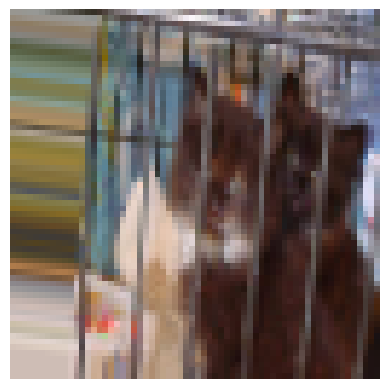

In [11]:
plt.axis('off')
img1 = plt.imshow(images[0])
img1

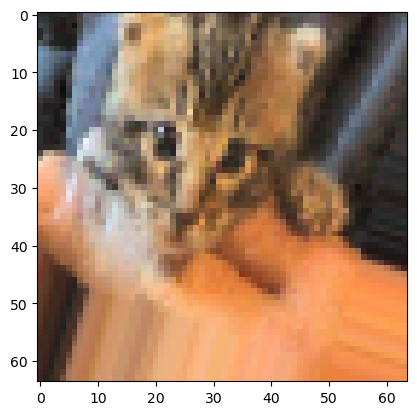

In [12]:
plt.imshow(images[31])

In [13]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])


In [14]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(train_dataset, epochs=5)

Epoch 1/5
782/782 [==============================] - 209s 266ms/step - loss: 0.6611 - accuracy: 0.5950
Epoch 2/5
782/782 [==============================] - 132s 169ms/step - loss: 0.5921 - accuracy: 0.6817
Epoch 3/5
782/782 [==============================] - 9080s 12s/step - loss: 0.5541 - accuracy: 0.7134
Epoch 4/5
782/782 [==============================] - 165s 211ms/step - loss: 0.5329 - accuracy: 0.7320
Epoch 5/5
782/782 [==============================] - 205s 262ms/step - loss: 0.5117 - accuracy: 0.7483


In [47]:
test_img = "datasets/dogvscat/test1/test_set/344.jpg"

In [34]:
from PIL import Image

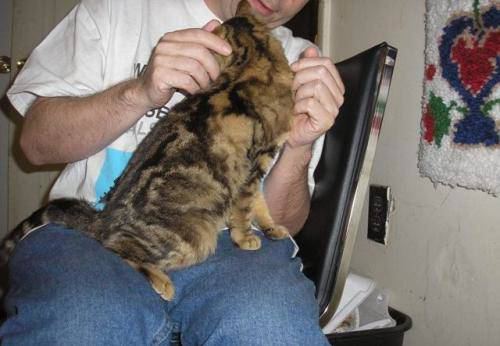

In [48]:
test = Image.open(test_img)
test

In [37]:
classes = ['cat','dog']

In [45]:
def test_image(image):
    if image=='RGBA':
        image = image.convert('RGB')
    resized=image.resize((64,64))
    image_arr=np.array(resized)
    normalized=image_arr/255
    final_img=np.expand_dims(normalized, axis=0)
    result = classes[np.argmax(model.predict(final_img))]
    return result

In [49]:
test_image(test)

1/1 [==============================] - 0s 31ms/step


'cat'

In [50]:
model.save('Cat_Dog_classifier.h5')